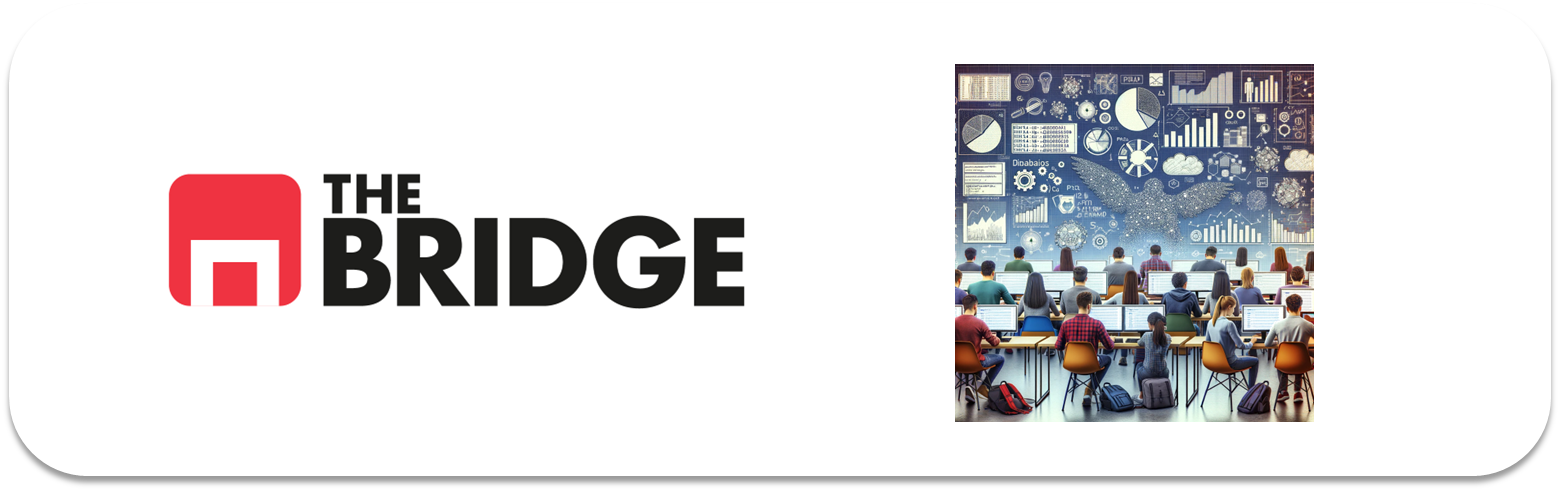

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [34]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [35]:
df = pd.read_csv("./data/titanic.csv")

In [36]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [37]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [38]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [39]:
df.describe


<bound method NDFrame.describe of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult

In [40]:
# Seleccionamos solo las columnas que vamos a usar
columnas_usar = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']

# Creamos un nuevo dataframe con solo estas columnas
df_modelo = df[columnas_usar].copy()


df_modelo.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [41]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df_modelo.isnull().sum())
print("\nPorcentaje de valores nulos:")
print(df_modelo.isnull().sum() / len(df_modelo) * 100)

Valores nulos por columna:
survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

Porcentaje de valores nulos:
survived     0.00000
pclass       0.00000
sex          0.00000
age         19.86532
sibsp        0.00000
parch        0.00000
fare         0.00000
dtype: float64


In [42]:
# Eliminar todas las filas que tengan al menos un valor nulo
df_modelo = df_modelo.dropna()

In [43]:
# Verificar que no quedan nulos
print("\nValores nulos restantes:")
print(df_modelo.isnull().sum())


Valores nulos restantes:
survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64


In [44]:
# Ver valores únicos antes de codificar
print("Valores únicos en 'sex':")
print(df_modelo['sex'].unique())

Valores únicos en 'sex':
['male' 'female']


In [45]:
# Codificar: male=1, female=0
df_modelo['sex'] = df_modelo['sex'].map({'male': 1, 'female': 0})

In [46]:
df_modelo.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [47]:
print(f"Total de registros limpios: {len(df_modelo)}")
print(f"Total de columnas: {len(df_modelo.columns)}")

Total de registros limpios: 714
Total de columnas: 7


In [48]:
# Contar cuántos sobrevivieron y cuántos no
print("Distribución de la variable 'survived':")
print(df_modelo['survived'].value_counts())

print("\nEn porcentajes:")
print(df_modelo['survived'].value_counts(normalize=True) * 100)

Distribución de la variable 'survived':
survived
0    424
1    290
Name: count, dtype: int64

En porcentajes:
survived
0    59.383754
1    40.616246
Name: proportion, dtype: float64


In [49]:
# Calcular y mostrar la tasa de supervivencia
tasa_supervivencia = df_modelo['survived'].mean() * 100
print(f"\nTasa de supervivencia: {tasa_supervivencia:.2f}%")


Tasa de supervivencia: 40.62%


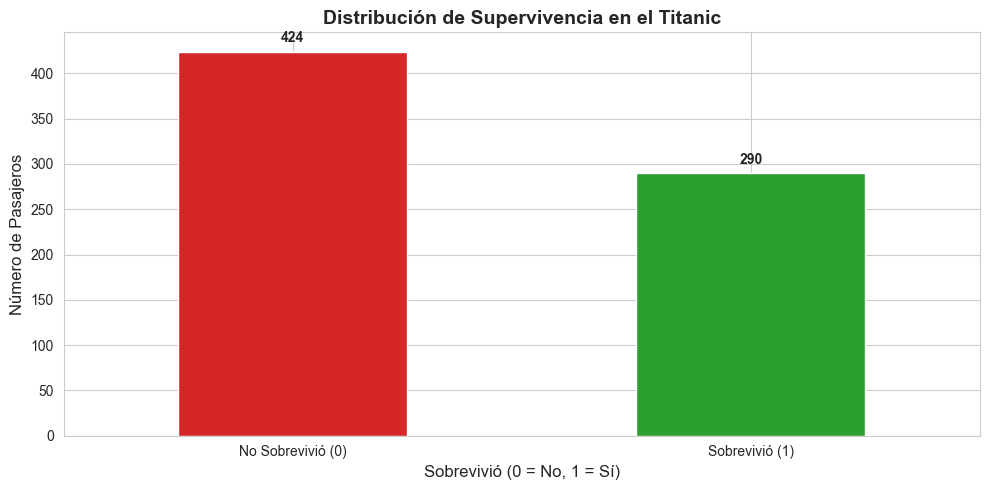

In [50]:


# Configurar estilo
sns.set_style('whitegrid')

# Crear la figura
plt.figure(figsize=(10, 5))

# Gráfico de barras
ax = df_modelo['survived'].value_counts().plot(kind='bar', color=['#d62728', '#2ca02c'])
plt.title('Distribución de Supervivencia en el Titanic', fontsize=14, fontweight='bold')
plt.xlabel('Sobrevivió (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Número de Pasajeros', fontsize=12)
plt.xticks([0, 1], ['No Sobrevivió (0)', 'Sobrevivió (1)'], rotation=0)

# Añadir los valores encima de cada barra
for i, v in enumerate(df_modelo['survived'].value_counts()):
    ax.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()



In [51]:
# Separar las features (variables predictoras) del target (variable a predecir)
X = df_modelo.drop('survived', axis=1)  # Todas las columnas EXCEPTO 'survived'
y = df_modelo['survived']                # Solo la columna 'survived'

print("Shape de X (features):", X.shape)
print("Shape de y (target):", y.shape)

Shape de X (features): (714, 6)
Shape de y (target): (714,)


In [52]:
print("\nDistribución de 'survived' en el dataset completo:")
print(y.value_counts())
print("\nEn porcentajes:")
print(y.value_counts(normalize=True) * 100)


Distribución de 'survived' en el dataset completo:
survived
0    424
1    290
Name: count, dtype: int64

En porcentajes:
survived
0    59.383754
1    40.616246
Name: proportion, dtype: float64


In [53]:


# Split 80% train - 20% test con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                      # Datos a dividir
    test_size=0.2,             # 20% para test, 80% para train
    random_state=42,           # Semilla para reproducibilidad
    stratify=y                 # ¡CLAVE! Estratificar por la variable target
)

print("Tamaños resultantes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Tamaños resultantes:
X_train: (571, 6)
X_test: (143, 6)
y_train: (571,)
y_test: (143,)


In [54]:

print("VERIFICACIÓN DE LA ESTRATIFICACIÓN")

print("\nDistribución en TRAIN:")
print(y_train.value_counts())
print("Porcentajes:")
print(y_train.value_counts(normalize=True) * 100)

print("\nDistribución en TEST:")
print(y_test.value_counts())
print("Porcentajes:")
print(y_test.value_counts(normalize=True) * 100)

print("\nDistribución ORIGINAL (para comparar):")
print(y.value_counts(normalize=True) * 100)

VERIFICACIÓN DE LA ESTRATIFICACIÓN

Distribución en TRAIN:
survived
0    339
1    232
Name: count, dtype: int64
Porcentajes:
survived
0    59.369527
1    40.630473
Name: proportion, dtype: float64

Distribución en TEST:
survived
0    85
1    58
Name: count, dtype: int64
Porcentajes:
survived
0    59.440559
1    40.559441
Name: proportion, dtype: float64

Distribución ORIGINAL (para comparar):
survived
0    59.383754
1    40.616246
Name: proportion, dtype: float64


In [55]:

print("FEATURES DISPONIBLES")

print(X_train.columns.tolist())


FEATURES DISPONIBLES
['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']


In [56]:
print(X_train.describe())

           pclass         sex         age       sibsp       parch        fare
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000
mean     2.239930    0.639229   29.332452    0.513135    0.439580   33.697438
std      0.837844    0.480645   14.489701    0.953895    0.867205   51.760020
min      1.000000    0.000000    0.750000    0.000000    0.000000    0.000000
25%      1.000000    0.000000   20.000000    0.000000    0.000000    8.050000
50%      2.000000    1.000000   28.000000    0.000000    0.000000   15.741700
75%      3.000000    1.000000   38.000000    1.000000    1.000000   31.275000
max      3.000000    1.000000   80.000000    5.000000    6.000000  512.329200


In [57]:
df_correlacion = X_train.copy()
df_correlacion['survived'] = y_train

# Calcular correlaciones con 'survived'
correlaciones = df_correlacion.corr()['survived'].sort_values(ascending=False)

print("CORRELACIÓN DE CADA FEATURE CON 'SURVIVED'")

print(correlaciones)


CORRELACIÓN DE CADA FEATURE CON 'SURVIVED'
survived    1.000000
fare        0.258337
parch       0.102958
sibsp      -0.015143
age        -0.088252
pclass     -0.364898
sex        -0.536856
Name: survived, dtype: float64


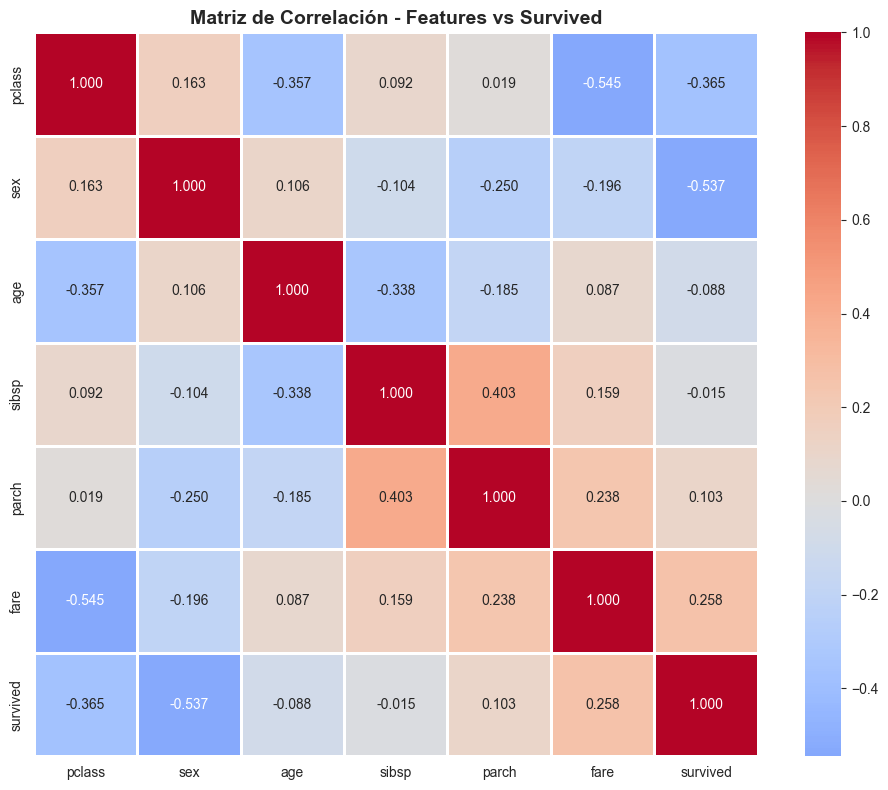

In [58]:
# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(df_correlacion.corr(), annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', square=True, linewidths=1)
plt.title('Matriz de Correlación - Features vs Survived', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

ANÁLISIS: SEX (Sexo)
         mean  count
sex                 
0    0.757282    206
1    0.208219    365

0 = Mujer, 1 = Hombre


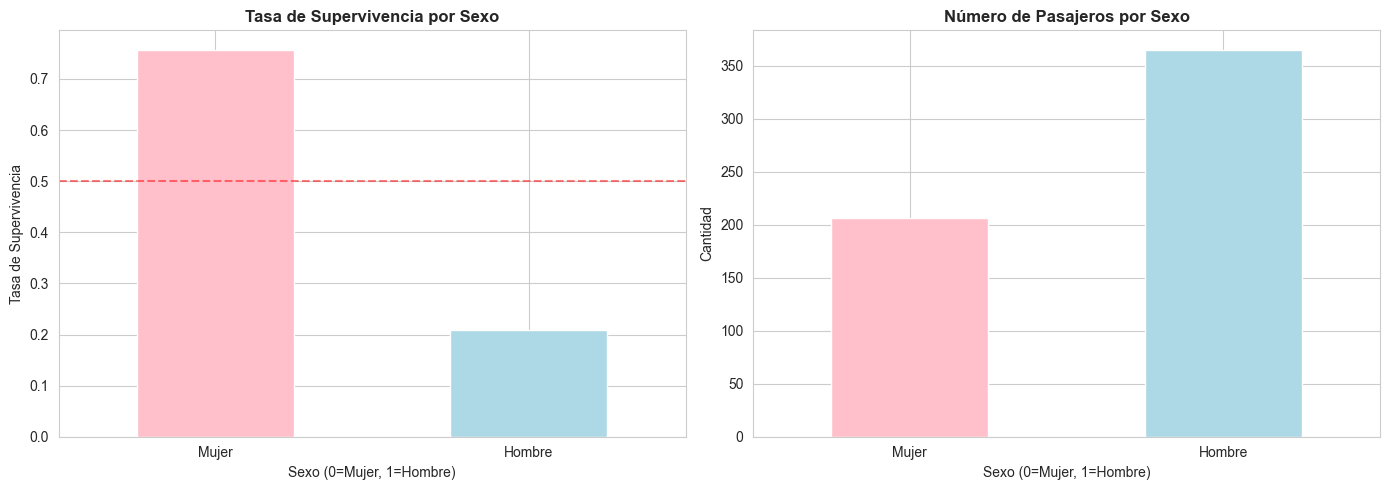

In [59]:

print("ANÁLISIS: SEX (Sexo)")

# Tasa de supervivencia por sexo
supervivencia_por_sexo = pd.DataFrame({
    'sex': X_train['sex'],
    'survived': y_train
}).groupby('sex')['survived'].agg(['mean', 'count'])

print(supervivencia_por_sexo)
print("\n0 = Mujer, 1 = Hombre")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Tasa de supervivencia
supervivencia_por_sexo['mean'].plot(kind='bar', ax=axes[0], color=['pink', 'lightblue'])
axes[0].set_title('Tasa de Supervivencia por Sexo', fontweight='bold')
axes[0].set_xlabel('Sexo (0=Mujer, 1=Hombre)')
axes[0].set_ylabel('Tasa de Supervivencia')
axes[0].set_xticklabels(['Mujer', 'Hombre'], rotation=0)
axes[0].axhline(y=0.5, color='red', linestyle='--', alpha=0.5)

# Gráfico 2: Conteo
supervivencia_por_sexo['count'].plot(kind='bar', ax=axes[1], color=['pink', 'lightblue'])
axes[1].set_title('Número de Pasajeros por Sexo', fontweight='bold')
axes[1].set_xlabel('Sexo (0=Mujer, 1=Hombre)')
axes[1].set_ylabel('Cantidad')
axes[1].set_xticklabels(['Mujer', 'Hombre'], rotation=0)

plt.tight_layout()
plt.show()

ANÁLISIS: PCLASS (Clase del pasajero)
            mean  count
pclass                 
1       0.648649    148
2       0.507246    138
3       0.231579    285

1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase


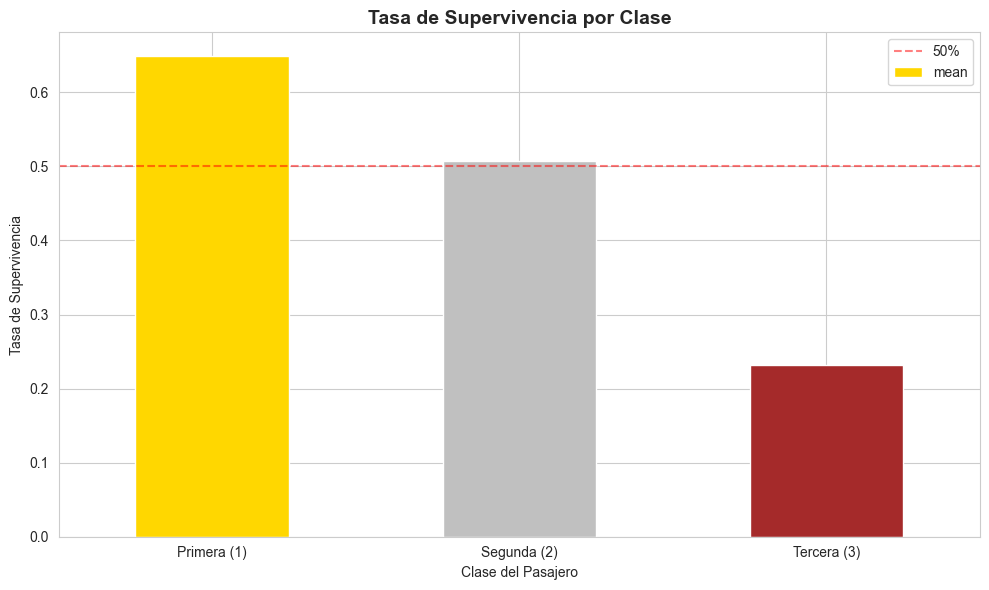

In [60]:
print("ANÁLISIS: PCLASS (Clase del pasajero)")


# Tasa de supervivencia por clase
supervivencia_por_clase = pd.DataFrame({
    'pclass': X_train['pclass'],
    'survived': y_train
}).groupby('pclass')['survived'].agg(['mean', 'count'])

print(supervivencia_por_clase)
print("\n1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase")

# Visualización
plt.figure(figsize=(10, 6))
supervivencia_por_clase['mean'].plot(kind='bar', color=['gold', 'silver', 'brown'])
plt.title('Tasa de Supervivencia por Clase', fontweight='bold', fontsize=14)
plt.xlabel('Clase del Pasajero')
plt.ylabel('Tasa de Supervivencia')
plt.xticks([0, 1, 2], ['Primera (1)', 'Segunda (2)', 'Tercera (3)'], rotation=0)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='50%')
plt.legend()
plt.tight_layout()
plt.show()

ANÁLISIS: AGE (Edad)
Edad promedio de sobrevivientes: 27.79 años
Edad promedio de no sobrevivientes: 30.39 años


C:\Users\lupep\AppData\Local\Temp\ipykernel_23748\3332428433.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([edad_no_sobrevivientes, edad_sobrevivientes], labels=['No Sobrevivió', 'Sobrevivió'])


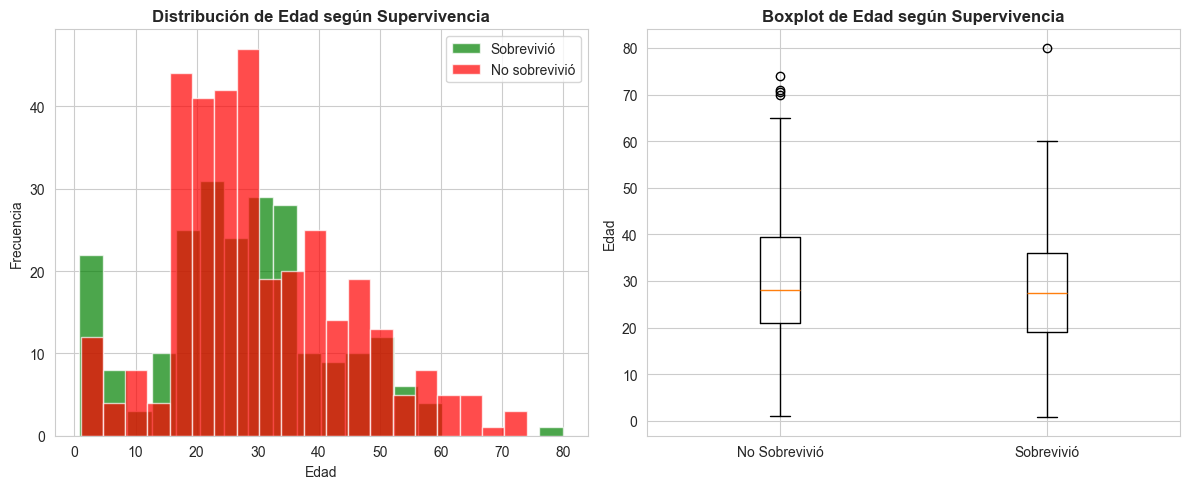

In [61]:

print("ANÁLISIS: AGE (Edad)")


# Comparar edades de sobrevivientes vs no sobrevivientes
edad_sobrevivientes = X_train.loc[y_train == 1, 'age']
edad_no_sobrevivientes = X_train.loc[y_train == 0, 'age']

print(f"Edad promedio de sobrevivientes: {edad_sobrevivientes.mean():.2f} años")
print(f"Edad promedio de no sobrevivientes: {edad_no_sobrevivientes.mean():.2f} años")

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(edad_sobrevivientes, bins=20, alpha=0.7, label='Sobrevivió', color='green')
plt.hist(edad_no_sobrevivientes, bins=20, alpha=0.7, label='No sobrevivió', color='red')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad según Supervivencia', fontweight='bold')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot([edad_no_sobrevivientes, edad_sobrevivientes], labels=['No Sobrevivió', 'Sobrevivió'])
plt.ylabel('Edad')
plt.title('Boxplot de Edad según Supervivencia', fontweight='bold')

plt.tight_layout()
plt.show()

ANÁLISIS: FARE (Precio del billete)
Tarifa promedio de sobrevivientes: $49.85
Tarifa promedio de no sobrevivientes: $22.65


C:\Users\lupep\AppData\Local\Temp\ipykernel_23748\3705924857.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fare_no_sobrevivientes, fare_sobrevivientes], labels=['No Sobrevivió', 'Sobrevivió'])


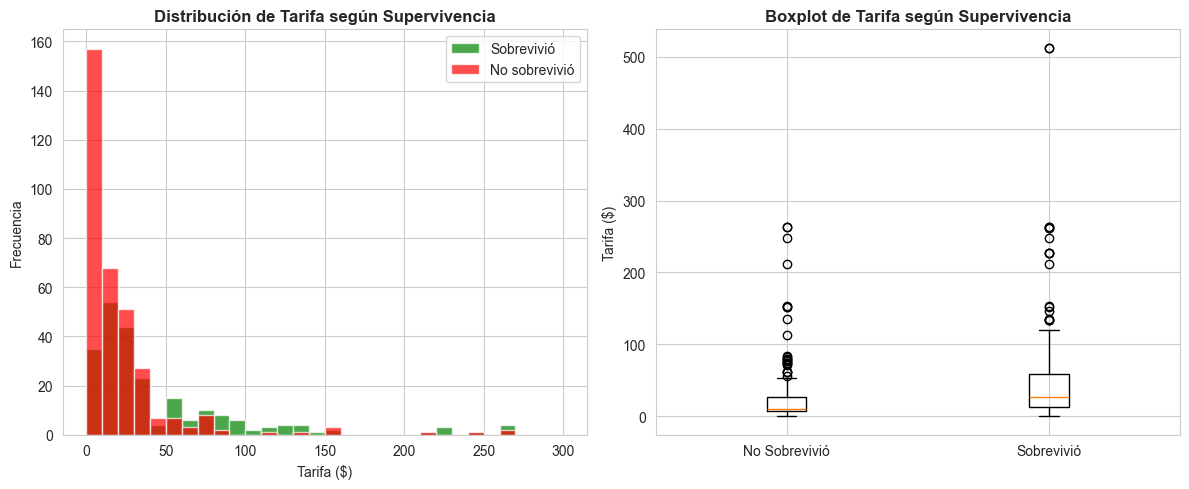

In [62]:

print("ANÁLISIS: FARE (Precio del billete)")


# Comparar tarifas
fare_sobrevivientes = X_train.loc[y_train == 1, 'fare']
fare_no_sobrevivientes = X_train.loc[y_train == 0, 'fare']

print(f"Tarifa promedio de sobrevivientes: ${fare_sobrevivientes.mean():.2f}")
print(f"Tarifa promedio de no sobrevivientes: ${fare_no_sobrevivientes.mean():.2f}")

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(fare_sobrevivientes, bins=30, alpha=0.7, label='Sobrevivió', color='green', range=(0, 300))
plt.hist(fare_no_sobrevivientes, bins=30, alpha=0.7, label='No sobrevivió', color='red', range=(0, 300))
plt.xlabel('Tarifa ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tarifa según Supervivencia', fontweight='bold')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot([fare_no_sobrevivientes, fare_sobrevivientes], labels=['No Sobrevivió', 'Sobrevivió'])
plt.ylabel('Tarifa ($)')
plt.title('Boxplot de Tarifa según Supervivencia', fontweight='bold')

plt.tight_layout()
plt.show()

ANÁLISIS: SIBSP (Hermanos/Cónyuges) y PARCH (Padres/Hijos)

SIBSP - Supervivencia por número de hermanos/cónyuges:
           mean  count
sibsp                 
0      0.367454    381
1      0.545455    143
2      0.500000     16
3      0.300000     10
4      0.176471     17
5      0.000000      4

PARCH - Supervivencia por número de padres/hijos:
           mean  count
parch                 
0      0.351807    415
1      0.568182     88
2      0.589286     56
3      0.666667      3
4      0.000000      4
5      0.250000      4
6      0.000000      1


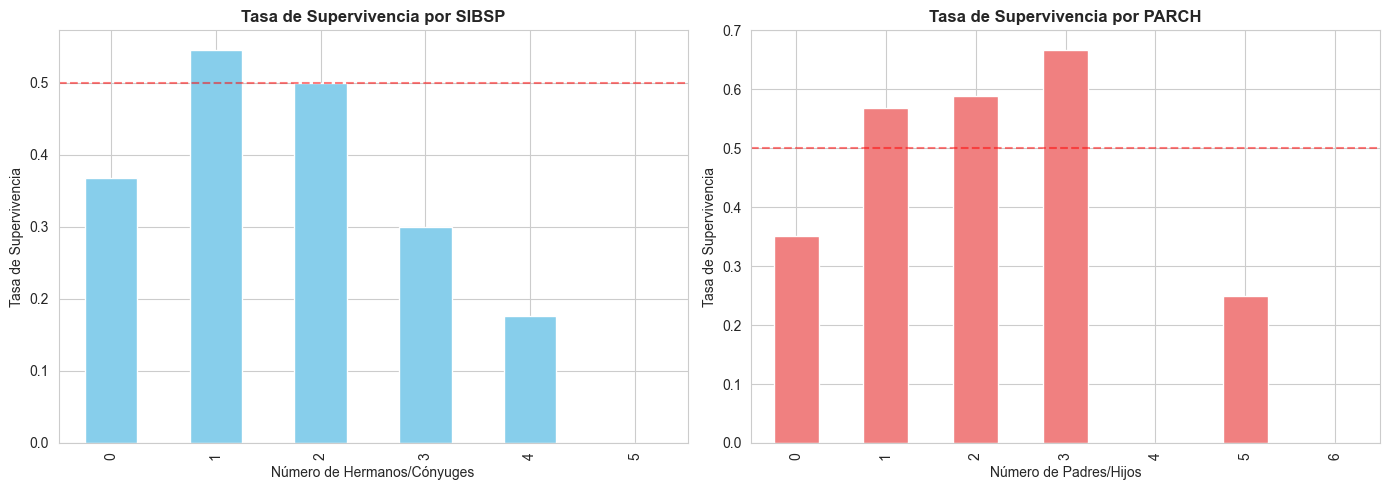

In [63]:
print("ANÁLISIS: SIBSP (Hermanos/Cónyuges) y PARCH (Padres/Hijos)")


# Análisis de sibsp
print("\nSIBSP - Supervivencia por número de hermanos/cónyuges:")
supervivencia_sibsp = pd.DataFrame({
    'sibsp': X_train['sibsp'],
    'survived': y_train
}).groupby('sibsp')['survived'].agg(['mean', 'count'])
print(supervivencia_sibsp)

# Análisis de parch
print("\nPARCH - Supervivencia por número de padres/hijos:")
supervivencia_parch = pd.DataFrame({
    'parch': X_train['parch'],
    'survived': y_train
}).groupby('parch')['survived'].agg(['mean', 'count'])
print(supervivencia_parch)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

supervivencia_sibsp['mean'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Tasa de Supervivencia por SIBSP', fontweight='bold')
axes[0].set_xlabel('Número de Hermanos/Cónyuges')
axes[0].set_ylabel('Tasa de Supervivencia')
axes[0].axhline(y=0.5, color='red', linestyle='--', alpha=0.5)

supervivencia_parch['mean'].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Tasa de Supervivencia por PARCH', fontweight='bold')
axes[1].set_xlabel('Número de Padres/Hijos')
axes[1].set_ylabel('Tasa de Supervivencia')
axes[1].axhline(y=0.5, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [64]:
# SELECCIÓN FINAL DE FEATURES
features_seleccionadas = ['sex', 'pclass', 'fare', 'age']

# Aplicar selección a train y test
X_train_final = X_train[features_seleccionadas].copy()
X_test_final = X_test[features_seleccionadas].copy()

# Verificación

print("DATASETS FINALES PARA EL MODELO")

print(f"X_train_final: {X_train_final.shape[0]} filas × {X_train_final.shape[1]} features")
print(f"X_test_final: {X_test_final.shape[0]} filas × {X_test_final.shape[1]} features")
print(f"\nFeatures: {list(X_train_final.columns)}")

print("\n" )
print("PRIMERAS FILAS DE X_train_final:")

print(X_train_final.head(10))

DATASETS FINALES PARA EL MODELO
X_train_final: 571 filas × 4 features
X_test_final: 143 filas × 4 features

Features: ['sex', 'pclass', 'fare', 'age']


PRIMERAS FILAS DE X_train_final:
     sex  pclass     fare   age
619    1       2  10.5000  26.0
622    1       3  15.7417  20.0
72     1       2  73.5000  21.0
339    1       1  35.5000  45.0
513    0       1  59.4000  54.0
37     1       3   8.0500  21.0
404    0       3   8.6625  20.0
647    1       1  35.5000  56.0
226    1       2  10.5000  19.0
255    0       3  15.2458  29.0


In [65]:
# Crear el scaler
scaler = StandardScaler()

# Ajustar solo con los datos de TRAIN
scaler.fit(X_train_final)

print("\n" )
print("SCALER AJUSTADO (valores calculados con TRAIN)")

print("\nMedias calculadas (μ):")
print(pd.Series(scaler.mean_, index=X_train_final.columns))

print("\nDesviaciones estándar calculadas (σ):")
print(pd.Series(scaler.scale_, index=X_train_final.columns))

NameError: name 'StandardScaler' is not defined

In [ ]:
# Transformar train (usando los parámetros que acabamos de calcular)
X_train_scaled = scaler.transform(X_train_final)

# Transformar test (usando los MISMOS parámetros de train)
X_test_scaled = scaler.transform(X_test_final)

# Convertir de nuevo a DataFrame para mantener nombres de columnas
X_train_scaled = pd.DataFrame(
    X_train_scaled, 
    columns=X_train_final.columns,
    index=X_train_final.index
)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test_final.columns,
    index=X_test_final.index
)


NameError: name 'scaler' is not defined

In [ ]:

print("COMPARACIÓN: ANTES vs DESPUÉS")


comparacion = pd.DataFrame({
    'Feature': features,
    'Media ANTES': X_train_final[features].mean().values,
    'Std ANTES': X_train_final[features].std().values,
    'Media DESPUÉS': X_train_scaled[features].mean().values,
    'Std DESPUÉS': X_train_scaled[features].std().values,
})

print(comparacion.to_string(index=False))



COMPARACIÓN: ANTES vs DESPUÉS
Feature  Media ANTES  Std ANTES  Media DESPUÉS  Std DESPUÉS
 pclass     2.239930   0.837844   6.221915e-17     1.000877
    sex     0.639229   0.480645   3.733149e-17     1.000877
    age    29.332452  14.489701  -2.239890e-16     1.000877
   fare    33.697438  51.760020  -1.073280e-16     1.000877


In [ ]:
from sklearn.linear_model import LogisticRegression




# Crear el modelo
modelo = LogisticRegression(
    random_state=42,        # Para reproducibilidad
    max_iter=1000,          # Número máximo de iteraciones
    solver='lbfgs',         # Algoritmo de optimización
    class_weight='balanced' # ¡IMPORTANTE! Maneja el desbalanceo 60-40
)


In [ ]:
# Entrenar el modelo
modelo.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [ ]:

print("COEFICIENTES APRENDIDOS POR EL MODELO")


# Obtener coeficientes
coeficientes = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coeficiente': modelo.coef_[0]  # [0] porque es clasificación binaria
}).sort_values('Coeficiente', key=abs, ascending=False)

print(coeficientes.to_string(index=False))





COEFICIENTES APRENDIDOS POR EL MODELO
Feature  Coeficiente
    sex    -1.154560
 pclass    -1.024289
    age    -0.546286
   fare     0.005844


VISUALIZACIÓN DE IMPORTANCIA DE FEATURES


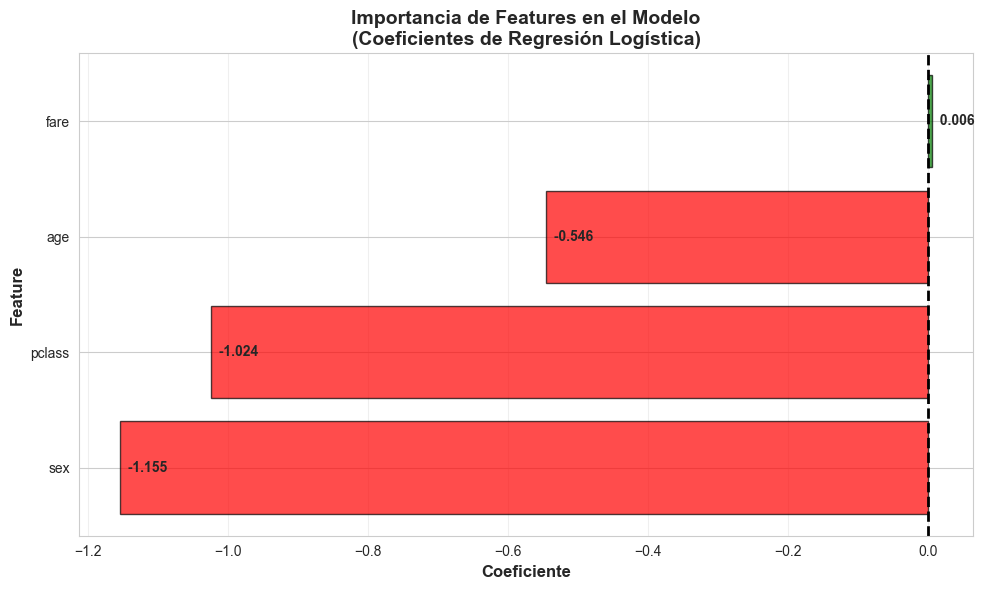

  ROJO = Reduce probabilidad de sobrevivir
  VERDE = Aumenta probabilidad de sobrevivir


In [ ]:


print("VISUALIZACIÓN DE IMPORTANCIA DE FEATURES")


# Gráfico de barras de coeficientes
plt.figure(figsize=(10, 6))

colors = ['red' if c < 0 else 'green' for c in coeficientes['Coeficiente']]

plt.barh(coeficientes['Feature'], coeficientes['Coeficiente'], color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Coeficiente', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Importancia de Features en el Modelo\n(Coeficientes de Regresión Logística)', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=2)
plt.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for i, (feat, coef) in enumerate(zip(coeficientes['Feature'], coeficientes['Coeficiente'])):
    plt.text(coef, i, f'  {coef:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


print("  ROJO = Reduce probabilidad de sobrevivir")
print("  VERDE = Aumenta probabilidad de sobrevivir")

VISUALIZACIÓN DE IMPORTANCIA DE FEATURES


<>:25: SyntaxWarning: invalid escape sequence '\R'
<>:25: SyntaxWarning: invalid escape sequence '\R'
C:\Users\lupep\AppData\Local\Temp\ipykernel_30424\204387611.py:25: SyntaxWarning: invalid escape sequence '\R'
  print("\ROJO = Reduce probabilidad de sobrevivir")


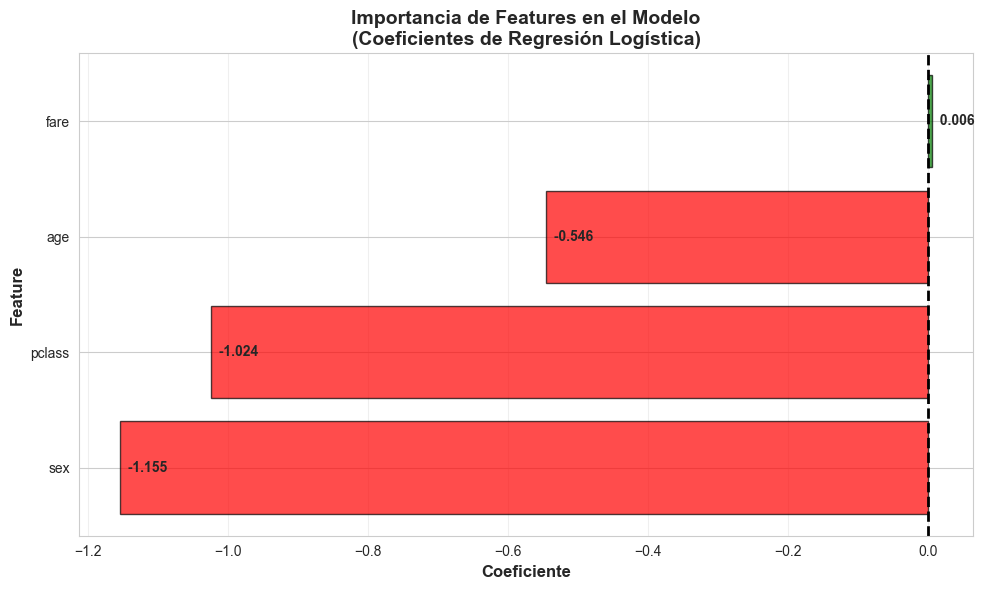

\ROJO = Reduce probabilidad de sobrevivir
  VERDE = Aumenta probabilidad de sobrevivir


In [ ]:

print("VISUALIZACIÓN DE IMPORTANCIA DE FEATURES")


# Gráfico de barras de coeficientes
plt.figure(figsize=(10, 6))

colors = ['red' if c < 0 else 'green' for c in coeficientes['Coeficiente']]

plt.barh(coeficientes['Feature'], coeficientes['Coeficiente'], color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Coeficiente', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Importancia de Features en el Modelo\n(Coeficientes de Regresión Logística)', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=2)
plt.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for i, (feat, coef) in enumerate(zip(coeficientes['Feature'], coeficientes['Coeficiente'])):
    plt.text(coef, i, f'  {coef:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


print("\ROJO = Reduce probabilidad de sobrevivir")
print("  VERDE = Aumenta probabilidad de sobrevivir")

In [ ]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    classification_report
)


print("MÉTRICAS DE CLASIFICACIÓN")


# ========== TRAIN ==========
print("\ CONJUNTO DE ENTRENAMIENTO (TRAIN):")


acc_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

print(f"Accuracy:  {acc_train:.4f} ({acc_train*100:.2f}%)")
print(f"Precision: {precision_train:.4f} ({precision_train*100:.2f}%)")
print(f"Recall:    {recall_train:.4f} ({recall_train*100:.2f}%)")
print(f"F1-Score:  {f1_train:.4f} ({f1_train*100:.2f}%)")

# ========== TEST ==========
print("\n CONJUNTO DE TEST:")


acc_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"Accuracy:  {acc_test:.4f} ({acc_test*100:.2f}%)")
print(f"Precision: {precision_test:.4f} ({precision_test*100:.2f}%)")
print(f"Recall:    {recall_test:.4f} ({recall_test*100:.2f}%)")
print(f"F1-Score:  {f1_test:.4f} ({f1_test*100:.2f}%)")

# ========== COMPARACIÓN ==========
print("\n COMPARACIÓN TRAIN vs TEST:")


comparacion_metricas = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [acc_train, precision_train, recall_train, f1_train],
    'Test': [acc_test, precision_test, recall_test, f1_test],
    'Diferencia': [
        acc_train - acc_test,
        precision_train - precision_test,
        recall_train - recall_test,
        f1_train - f1_test
    ]
})

print(comparacion_metricas.to_string(index=False))

MÉTRICAS DE CLASIFICACIÓN
\ CONJUNTO DE ENTRENAMIENTO (TRAIN):
Accuracy:  0.8021 (80.21%)
Precision: 0.7352 (73.52%)
Recall:    0.8017 (80.17%)
F1-Score:  0.7670 (76.70%)

 CONJUNTO DE TEST:
Accuracy:  0.8042 (80.42%)
Precision: 0.7344 (73.44%)
Recall:    0.8103 (81.03%)
F1-Score:  0.7705 (77.05%)

 COMPARACIÓN TRAIN vs TEST:
  Métrica    Train     Test  Diferencia
 Accuracy 0.802102 0.804196   -0.002094
Precision 0.735178 0.734375    0.000803
   Recall 0.801724 0.810345   -0.008621
 F1-Score 0.767010 0.770492   -0.003481


<>:14: SyntaxWarning: invalid escape sequence '\ '
<>:14: SyntaxWarning: invalid escape sequence '\ '
C:\Users\lupep\AppData\Local\Temp\ipykernel_30424\2573850294.py:14: SyntaxWarning: invalid escape sequence '\ '
  print("\ CONJUNTO DE ENTRENAMIENTO (TRAIN):")


MATRICES DE CONFUSIÓN


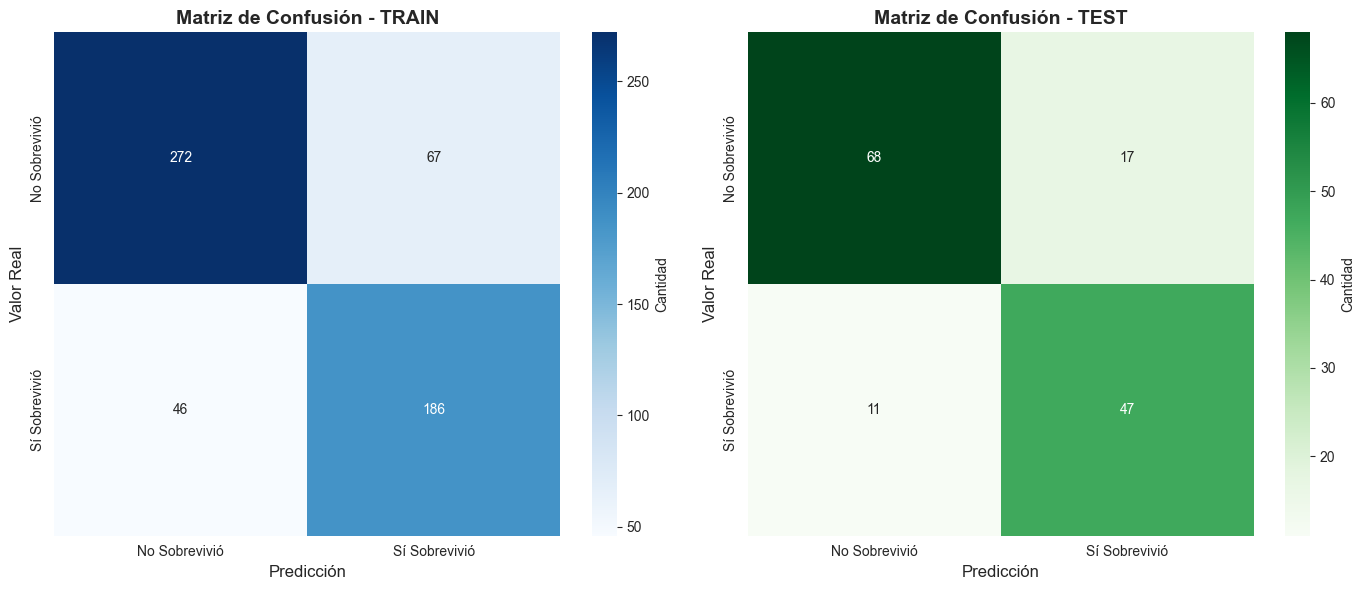

In [ ]:




print("MATRICES DE CONFUSIÓN")


# Calcular matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Crear figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ========== MATRIZ TRAIN ==========
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Sobrevivió', 'Sí Sobrevivió'],
            yticklabels=['No Sobrevivió', 'Sí Sobrevivió'],
            ax=axes[0], cbar_kws={'label': 'Cantidad'})
axes[0].set_title('Matriz de Confusión - TRAIN', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Valor Real', fontsize=12)
axes[0].set_xlabel('Predicción', fontsize=12)

# ========== MATRIZ TEST ==========
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Sobrevivió', 'Sí Sobrevivió'],
            yticklabels=['No Sobrevivió', 'Sí Sobrevivió'],
            ax=axes[1], cbar_kws={'label': 'Cantidad'})
axes[1].set_title('Matriz de Confusión - TEST', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Valor Real', fontsize=12)
axes[1].set_xlabel('Predicción', fontsize=12)

plt.tight_layout()
plt.show()



In [ ]:



print("CURVA ROC Y AUC SCORE")


# Calcular curvas ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Calcular AUC
auc_train = roc_auc_score(y_train, y_train_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

print(f"\n AUC-ROC TRAIN: {auc_train:.4f}")
print(f" AUC-ROC TEST:  {auc_test:.4f}")
print(f" Diferencia:    {auc_train - auc_test:.4f}")

# Visualización
plt.figure(figsize=(10, 8))

# Curva TRAIN
plt.plot(fpr_train, tpr_train, color='blue', lw=2, 
         label=f'ROC Train (AUC = {auc_train:.4f})', alpha=0.7)

# Curva TEST
plt.plot(fpr_test, tpr_test, color='green', lw=2, 
         label=f'ROC Test (AUC = {auc_test:.4f})', alpha=0.7)

# Línea diagonal (clasificador aleatorio)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', 
         label='Clasificador Aleatorio (AUC = 0.50)', alpha=0.7)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12, fontweight='bold')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12, fontweight='bold')
plt.title('Curvas ROC - Train vs Test', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



CURVA ROC Y AUC SCORE


NameError: name 'y_train_proba' is not defined

DISTRIBUCIÓN DE PROBABILIDADES PREDICHAS


NameError: name 'y_train_proba' is not defined

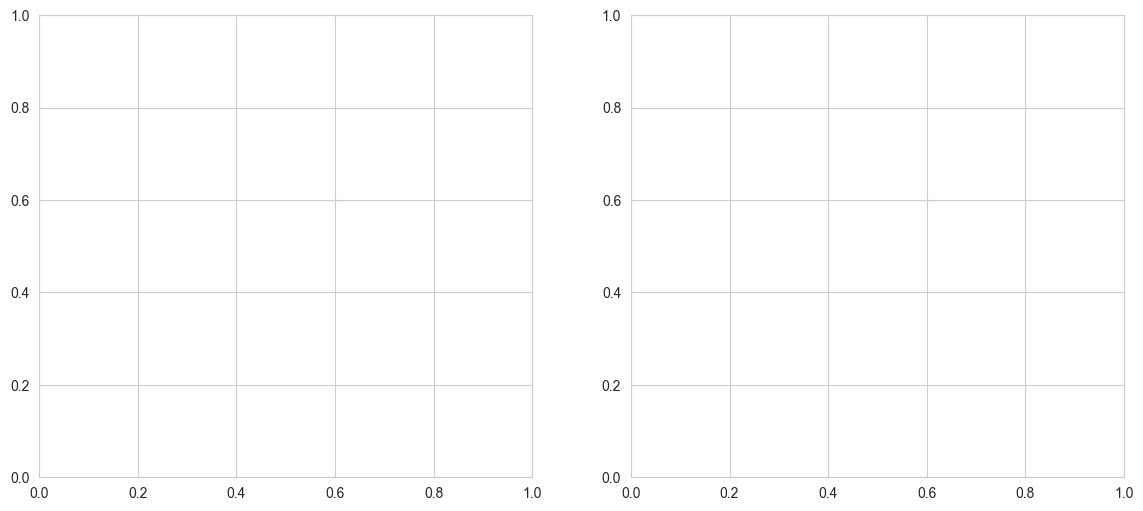

In [ ]:

print("DISTRIBUCIÓN DE PROBABILIDADES PREDICHAS")


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ========== TRAIN ==========
axes[0].hist(y_train_proba[y_train == 0], bins=30, alpha=0.6, label='No Sobrevivió (0)', color='red')
axes[0].hist(y_train_proba[y_train == 1], bins=30, alpha=0.6, label='Sí Sobrevivió (1)', color='green')
axes[0].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Umbral = 0.5')
axes[0].set_xlabel('Probabilidad predicha', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
axes[0].set_title('Distribución de Probabilidades - TRAIN', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# ========== TEST ==========
axes[1].hist(y_test_proba[y_test == 0], bins=30, alpha=0.6, label='No Sobrevivió (0)', color='red')
axes[1].hist(y_test_proba[y_test == 1], bins=30, alpha=0.6, label='Sí Sobrevivió (1)', color='green')
axes[1].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Umbral = 0.5')
axes[1].set_xlabel('Probabilidad predicha', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
axes[1].set_title('Distribución de Probabilidades - TEST', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()



In [ ]:

print(" ASSESSMENT DE GENERALIZACIÓN DEL MODELO")


# Calcular diferencias
diff_acc = abs(acc_train - acc_test)
diff_f1 = abs(f1_train - f1_test)
diff_auc = abs(auc_train - auc_test)

print("\n ANÁLISIS DE DIFERENCIAS TRAIN vs TEST:")

print(f"   Diferencia en Accuracy:  {diff_acc:.4f}")
print(f"   Diferencia en F1-Score:  {diff_f1:.4f}")
print(f"   Diferencia en AUC:       {diff_auc:.4f}")

# Diagnóstico de generalización
print("\n DIAGNÓSTICO:")


if diff_acc < 0.03 and diff_f1 < 0.03 and diff_auc < 0.03:
    generalizacion = "EXCELENTE"
    
    explicacion = "El modelo generaliza extraordinariamente bien. Las diferencias son mínimas."
elif diff_acc < 0.05 and diff_f1 < 0.05 and diff_auc < 0.05:
    generalizacion = "MUY BUENA"
    
    explicacion = "El modelo generaliza muy bien. Diferencias pequeñas y aceptables."
elif diff_acc < 0.10 and diff_f1 < 0.10 and diff_auc < 0.10:
    generalizacion = "BUENA"
    
    explicacion = "El modelo generaliza bien, aunque hay ligero overfitting."
elif diff_acc < 0.15 and diff_f1 < 0.15:
    generalizacion = "ACEPTABLE"
  
    explicacion = "Hay overfitting moderado. El modelo memoriza parte de train."
else:
    generalizacion = "POBRE"
  
    explicacion = "Overfitting significativo. El modelo no generaliza bien."

print(f"    GENERALIZACIÓN: {generalizacion}")
print(f"   {explicacion}")

# Rendimiento absoluto en test
print("\n RENDIMIENTO EN TEST (lo que realmente importa):")
print("-"*70)
if acc_test >= 0.85:
    nivel_acc = "Excelente"
elif acc_test >= 0.80:
    nivel_acc = "Muy bueno"
elif acc_test >= 0.75:
    nivel_acc = "Bueno"
elif acc_test >= 0.70:
    nivel_acc = "Aceptable"
else:
    nivel_acc = "Mejorable"

print(f"   Accuracy: {acc_test:.4f} → {nivel_acc}")

if f1_test >= 0.80:
    nivel_f1 = "Excelente"
elif f1_test >= 0.75:
    nivel_f1 = "Muy bueno"
elif f1_test >= 0.70:
    nivel_f1 = "Bueno"
elif f1_test >= 0.65:
    nivel_f1 = "Aceptable"
else:
    nivel_f1 = "Mejorable"

print(f"   F1-Score: {f1_test:.4f} → {nivel_f1}")

if auc_test >= 0.90:
    nivel_auc = "Excelente"
elif auc_test >= 0.85:
    nivel_auc = "Muy bueno"
elif auc_test >= 0.80:
    nivel_auc = "Bueno"
elif auc_test >= 0.75:
    nivel_auc = "Aceptable"
else:
    nivel_auc = "Mejorable"

print(f"   AUC-ROC:  {auc_test:.4f} → {nivel_auc}")



 ASSESSMENT DE GENERALIZACIÓN DEL MODELO

 ANÁLISIS DE DIFERENCIAS TRAIN vs TEST:
   Diferencia en Accuracy:  0.0021
   Diferencia en F1-Score:  0.0035
   Diferencia en AUC:       0.0008

 DIAGNÓSTICO:
    GENERALIZACIÓN: EXCELENTE
   El modelo generaliza extraordinariamente bien. Las diferencias son mínimas.

 RENDIMIENTO EN TEST (lo que realmente importa):
----------------------------------------------------------------------
   Accuracy: 0.8042 → Muy bueno
   F1-Score: 0.7705 → Muy bueno
   AUC-ROC:  0.8524 → Muy bueno
